# Checking data
### A replication of table 2 in the paper of the previous analysis to confirm the dataset is as expected.



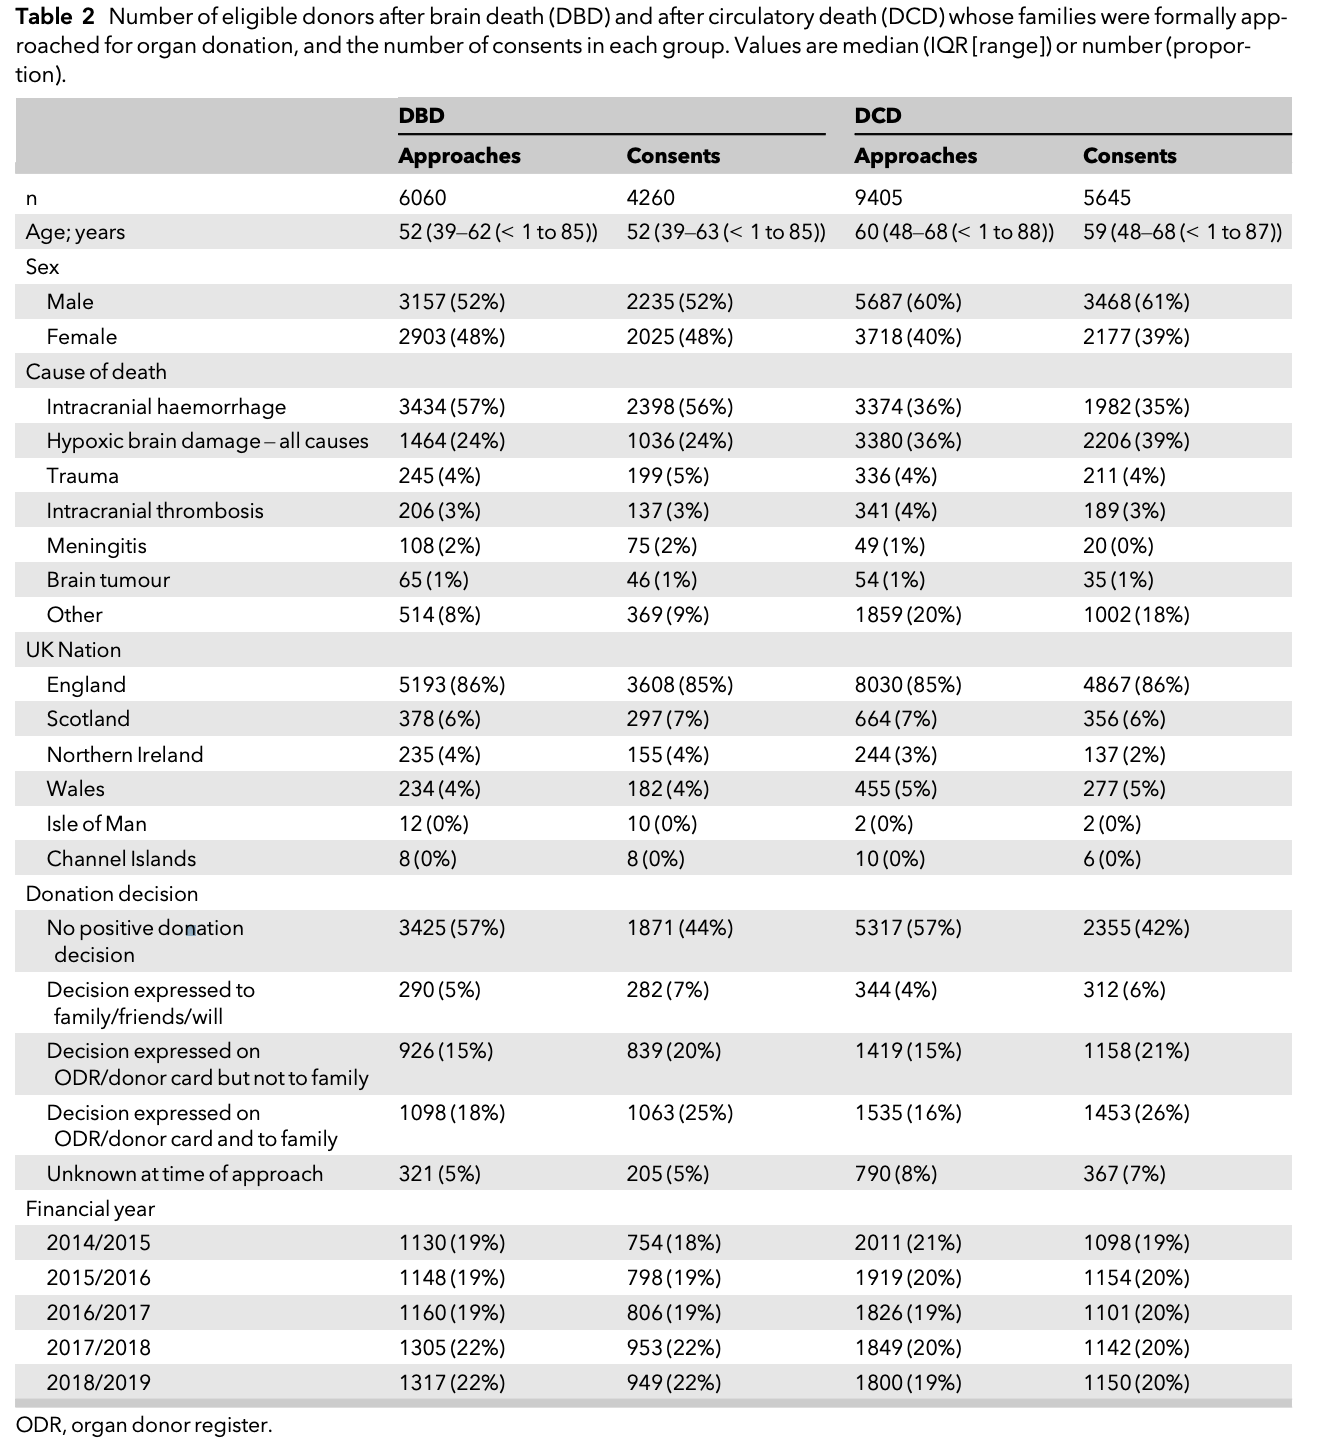

## Read in the SAS dataset and create DBD and DCD approach cohorts to match those used in previous analysis cohort 

In [16]:
#import data
import pandas as pd

In [26]:
#Read in dataset with all rows included
df = pd.read_sas("/Users/roddy.jacques/Documents/DSA Project/Data/alldata3.sas7bdat")

#6931 DBD apps
dbd_apps = df[(df["eli_DBD"]==1)&(df["FAMILY_APPROACHED"]==2)]
print(str(dbd_apps.shape[0]) + " DBD approaches")

#6060 DBD apps to match cohort in paper
dbd_apps = dbd_apps[(dbd_apps["eth_grp"]!=5)&(dbd_apps["FORMAL_APR_WHEN"]!=4)&(dbd_apps["donation_mentioned"]!=-1)
                    &(dbd_apps["FAMILY_WITNESS_BSDT"]!=9)&(dbd_apps["GENDER"]!=9)]
print(str(dbd_apps.shape[0]) + " DBD approaches with missing and unknown data removed\n")
     
#9965 DCD apps
dcd_apps = df[(df["eli_DCD"]==1)&(df["FAMILY_APPROACHED"]==2)]
print(str(dcd_apps.shape[0]) + " DCD approaches")

#9405 DCD apps to match cohort in paper
dcd_apps = dcd_apps[(dcd_apps["GENDER"]!=9)&(dcd_apps["cod_neuro"].notna())&(dcd_apps["eth_grp"]!=5)&(dcd_apps["donation_mentioned"]!=-1)&
                    (~dcd_apps["DTC_WD_TRTMENT_PRESENT"].isin([8,9]))]
print(str(dcd_apps.shape[0]) + " DCD approaches with missing and unknown data removed\n")

dbd_cons = dbd_apps[dbd_apps["FAMILY_CONSENT"]==2]
dcd_cons = dcd_apps[dcd_apps["FAMILY_CONSENT"]==2]
print(str(dbd_cons.shape[0]) + " DBD consents with missing and unknown data removed")
print(str(dcd_cons.shape[0]) + " DCD consents with missing and unknown data removed")

6931 DBD approaches
6060 DBD approaches with missing and unknown data removed

9965 DCD approaches
9405 DCD approaches with missing and unknown data removed

4260 DBD consents with missing and unknown data removed
5645 DCD consents with missing and unknown data removed


In [19]:
print(dbd_apps["AGE_YEARS"].describe())
print(dcd_apps["AGE_YEARS"].describe())

print(dbd_cons["AGE_YEARS"].describe())
print(dcd_cons["AGE_YEARS"].describe())

count    6060.000000
mean       49.754290
std        16.940159
min         0.000000
25%        39.000000
50%        52.000000
75%        62.000000
max        85.000000
Name: AGE_YEARS, dtype: float64
count    9405.000000
mean       55.934716
std        17.312537
min         0.000000
25%        48.000000
50%        60.000000
75%        68.000000
max        88.000000
Name: AGE_YEARS, dtype: float64
count    4260.000000
mean       49.915728
std        17.117351
min         0.000000
25%        39.000000
50%        52.000000
75%        63.000000
max        85.000000
Name: AGE_YEARS, dtype: float64
count    5645.000000
mean       56.260053
std        16.254739
min         0.000000
25%        48.000000
50%        59.000000
75%        68.000000
max        87.000000
Name: AGE_YEARS, dtype: float64


In [20]:
print(dbd_apps["GENDER"].value_counts())
print(dcd_apps["GENDER"].value_counts())

print(dbd_cons["GENDER"].value_counts())
print(dcd_cons["GENDER"].value_counts())

1.0    3157
2.0    2903
Name: GENDER, dtype: int64
1.0    5687
2.0    3718
Name: GENDER, dtype: int64
1.0    2235
2.0    2025
Name: GENDER, dtype: int64
1.0    3468
2.0    2177
Name: GENDER, dtype: int64


In [21]:
print(dbd_apps["COD"].value_counts())
print(dcd_apps["COD"].value_counts())

print(dbd_cons["COD"].value_counts())
print(dcd_cons["COD"].value_counts())

10.0    3434
13.0    1464
11.0     206
19.0     172
98.0     120
40.0     119
70.0     108
31.0      82
12.0      65
20.0      43
30.0      39
23.0      38
99.0      21
90.0      21
21.0      18
72.0      17
22.0      15
41.0      14
39.0      10
49.0      10
82.0       8
24.0       6
71.0       5
52.0       5
76.0       3
81.0       3
85.0       3
51.0       2
53.0       2
45.0       2
75.0       1
73.0       1
54.0       1
29.0       1
43.0       1
Name: COD, dtype: int64
13.0    3380
10.0    3374
40.0     426
11.0     341
19.0     332
53.0     313
98.0     221
76.0     133
31.0     120
51.0      90
20.0      55
12.0      54
30.0      53
23.0      50
99.0      49
70.0      49
41.0      45
74.0      39
50.0      38
71.0      32
49.0      30
90.0      30
21.0      25
82.0      22
22.0      14
44.0      14
39.0      12
72.0      11
59.0       9
45.0       8
75.0       8
24.0       7
43.0       6
73.0       3
78.0       3
85.0       3
42.0       2
52.0       2
80.0       1
54.0       1
N

In [22]:
print(dbd_apps["NATION"].value_counts())
print(dcd_apps["NATION"].value_counts())

print(dbd_cons["NATION"].value_counts())
print(dcd_cons["NATION"].value_counts())

b'ENGLAND'             5193
b'SCOTLAND'             378
b'NORTHERN IRELAND'     235
b'WALES'                234
b'ISLE OF MAN'           12
b'CHANNEL ISLANDS'        8
Name: NATION, dtype: int64
b'ENGLAND'             8030
b'SCOTLAND'             664
b'WALES'                455
b'NORTHERN IRELAND'     244
b'CHANNEL ISLANDS'       10
b'ISLE OF MAN'            2
Name: NATION, dtype: int64
b'ENGLAND'             3608
b'SCOTLAND'             297
b'WALES'                182
b'NORTHERN IRELAND'     155
b'ISLE OF MAN'           10
b'CHANNEL ISLANDS'        8
Name: NATION, dtype: int64
b'ENGLAND'             4867
b'SCOTLAND'             356
b'WALES'                277
b'NORTHERN IRELAND'     137
b'CHANNEL ISLANDS'        6
b'ISLE OF MAN'            2
Name: NATION, dtype: int64


In [23]:
print(dbd_apps["wish"].value_counts())
print(dcd_apps["wish"].value_counts())

print(dbd_cons["wish"].value_counts())
print(dcd_cons["wish"].value_counts())

1.0    3425
4.0    1098
3.0     926
5.0     321
2.0     290
Name: wish, dtype: int64
1.0    5317
4.0    1535
3.0    1419
5.0     790
2.0     344
Name: wish, dtype: int64
1.0    1871
4.0    1063
3.0     839
2.0     282
5.0     205
Name: wish, dtype: int64
1.0    2355
4.0    1453
3.0    1158
5.0     367
2.0     312
Name: wish, dtype: int64


In [24]:
print(dbd_apps["fyr"].value_counts())
print(dcd_apps["fyr"].value_counts())

print(dbd_cons["fyr"].value_counts())
print(dcd_cons["fyr"].value_counts())

2019.0    1315
2018.0    1304
2017.0    1155
2016.0    1148
2015.0    1127
2020.0       1
Name: fyr, dtype: int64
2015.0    1856
2016.0    1832
2018.0    1768
2017.0    1727
2019.0    1698
2020.0      10
2014.0       2
Name: fyr, dtype: int64
2018.0    952
2019.0    947
2017.0    804
2016.0    798
2015.0    752
2020.0      1
Name: fyr, dtype: int64
2016.0    1108
2018.0    1094
2019.0    1081
2017.0    1044
2015.0    1026
2020.0       7
2014.0       1
Name: fyr, dtype: int64
